<a href="https://colab.research.google.com/github/Musaddiq98/Data-Science-Assignments/blob/main/Decision_Tree_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using decision trees to prepare a model on fraud data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
fd=pd.read_csv("Fraud_check.csv")

In [ ]:
fd.head(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES


In [ ]:
fd.tail(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
fd.shape

(600, 6)

In [ ]:
fd.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fd.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fd=pd.get_dummies(fd,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fd["TaxInc"] = pd.cut(fd["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

**Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”**

In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fd = pd.get_dummies(fd,columns = ["TaxInc"],drop_first=True)

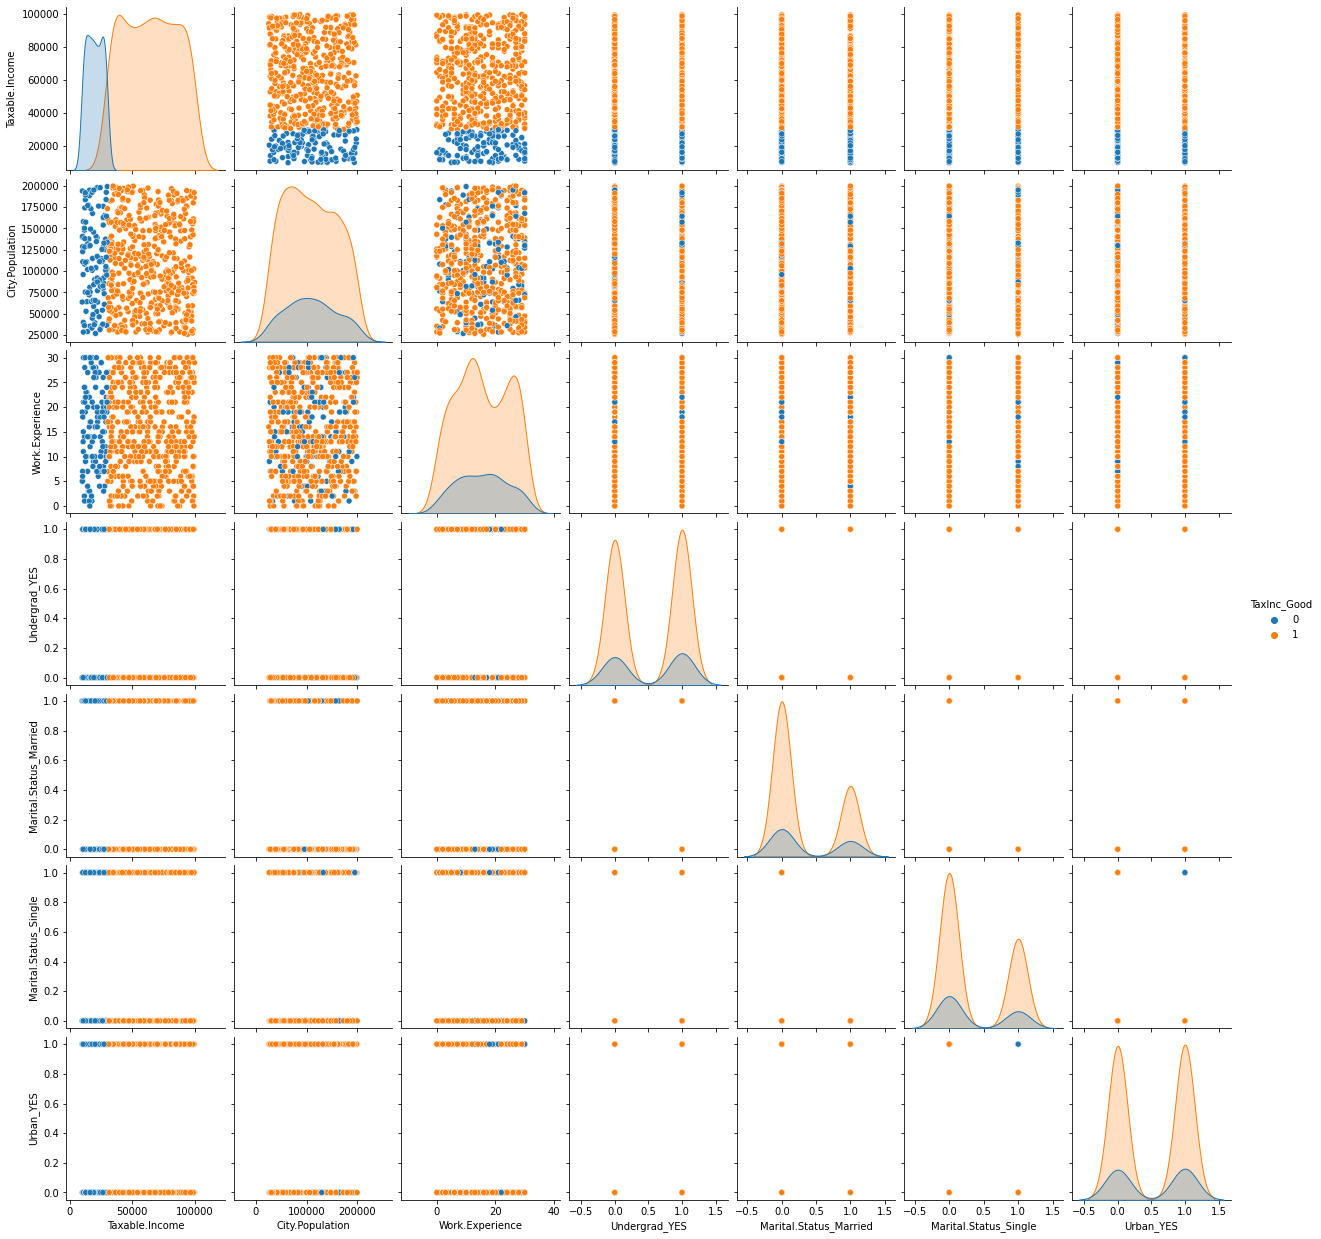

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fd, hue = 'TaxInc_Good')

In [ ]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)



In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(fd.iloc[:,1:])
df_norm.tail(10)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
##Converting the Taxable income variable to bucketing.
df_norm["income"]="<=30000"
df_norm.loc[fd["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[fd["Taxable.Income"]<=30000,"income"]="Risky"

In [ ]:
##Droping the Taxable income variable
fd.drop(["Taxable.Income"],axis=1,inplace=True)

In [ ]:
fd.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fd.columns:
    if fd[column_name].dtype == object:
        fd[column_name] = le.fit_transform(fd[column_name])
    else:
        pass

In [ ]:
##Splitting the data into featuers and labels
features = fd.iloc[:,0:5]
labels = fd.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(fd.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.3,stratify = labels)

In [ ]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [ ]:
model.oob_score_


0.530952380952381

In [ ]:
##Predictions on train data
prediction = model.predict(x_train)

In [ ]:
##Accuracy
# For accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
print(accuracy)

0.9904761904761905


In [ ]:
np.mean(prediction == y_train)

0.9904761904761905

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [ ]:
##Prediction on test data
pred_test = model.predict(x_test)

In [ ]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
print(acc_test)

0.5277777777777778


#Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

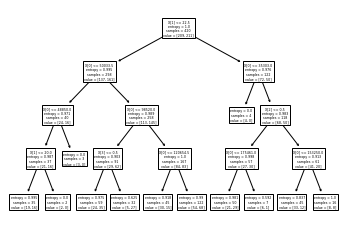

In [ ]:
from sklearn import tree
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
colnames = list(fd.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

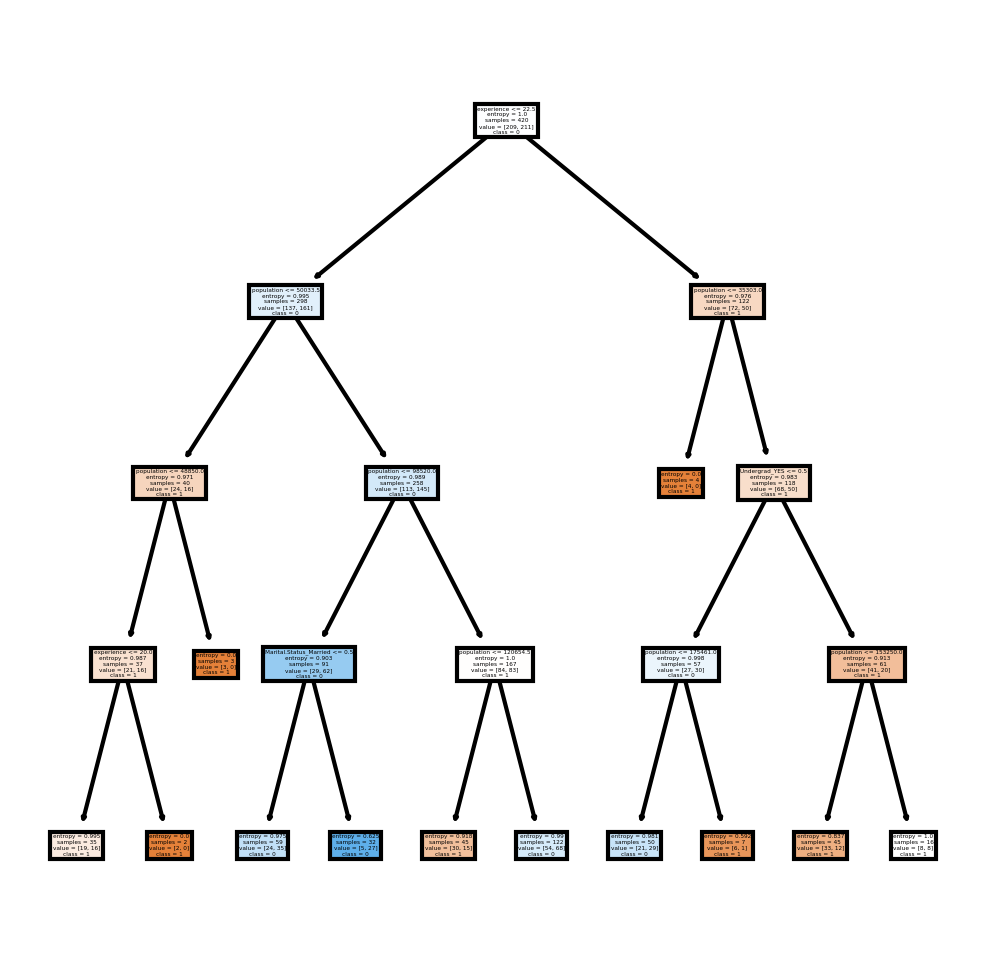

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,35,54
1,29,62


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.5388888888888889

## Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5388888888888889

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
array = fd.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
ms=model.score(X_test,y_test)
print(abs(ms))

0.8910211514217676
